<h1 align='center' style='color:purple'> 03. Clustering With K Means </h1>

https://www.youtube.com/watch?v=EItlUEPCIzM
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

Let's take a look at a simple dataset and see the k-means result.



Consider `income.csv` file from `Canvas LMS`. 

* Attributes of this database are `Name, Age,Income(Rs)`
* We want to divide the database into various groups according to characteristics. Groups may be belongs to (i) particular region of India where salaries are higher or lower, OR (ii) certain professionals where the salary is higher verses less
* Import dataset into pandas by defining alies `pd` 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income(Rs)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


We first plot this data in a graph using `scatter` function without `name`. Graph is ploteed `Age` against ` Income(Rs)`

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Income(Rs)')

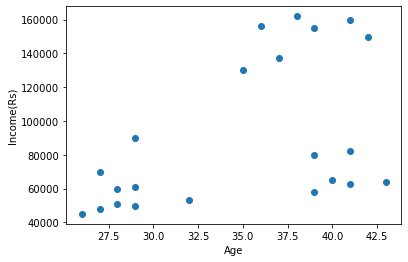

In [4]:
plt.scatter(df['Age'],df['Income(Rs)'])
plt.xlabel('Age')
plt.ylabel('Income(Rs)')

From above we can see 3 clusters. So here choosing K is easy 

Use  `KMeans` algorithm of `sklearn.cluster` package

In [5]:
from sklearn.cluster import KMeans

Take number of clusters as 3 so we write `n_clusters=3`

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

## fit_predict( ) 

Many sklearn objects, implement three specific methods namely `fit()`, `predict()`and `fit_predict()`. 

* `fit()` accepts an input for the sample data (X) and for supervised models also it accepts an argument for labels (i.e. target data y ). In otherwords,  in any classifier we call `fit()` to train the model using the input training and data.

* `predict()` After training the model, the next step is to predict over the testing set using `predict()`.

* `fit_predict()` is more relevant to unsupervised learning. This method will fit and perform predictions over training data. It is more appropriate when performing operations such as clustering.

Here there is no need of `Name` feature for analysis so from data frame, remove `Name`

In [7]:
y_predicted = km.fit_predict(df[['Age','Income(Rs)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

**Note: From above, observed that there are three clusters created viz. 0,1,2.** 

Now, append `cluster` column in data frame so that it is easy to visalised.

In [8]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income(Rs),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


**NOTE: From above now it is observed that 0 and 1 belongs to same group and so on.**

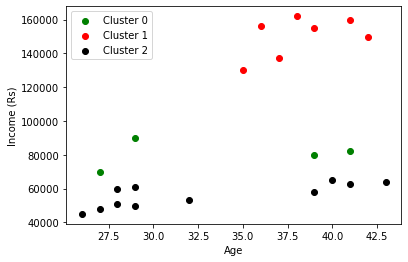

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income(Rs)'],color='green',label="Cluster 0")
plt.scatter(df2['Age'],df2['Income(Rs)'],color='red',label="Cluster 1")
plt.scatter(df3['Age'],df3['Income(Rs)'],color='black', label="Cluster 2")

plt.xlabel('Age')
plt.ylabel('Income (Rs)')
plt.legend()


 * `legend()` function prints all three coloured pixels as label on left hand side corner
 
 * `Cluster 1` is shown properly but not other two Clusters
 
 *  Observe that few points of `Cluster 0` are shown in `Cluster 2`. This problem is happening because our scaling in not proper.Here Y axis is scaled from 40000 to 160000 but range of X axis is narrow.The difference is 120000 on Y axis but hardly 20 on X axis.
 
 * This problem is happening because scaling is not proper. It can be done using `min maxscalar` of data preprocessing. 

## Preprocessing using min max scaler

**Import `MinMaxScaler` from `preprocessing` of `sklearn`:**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

* `fit()` function fits attribute `Income(Rs)` of dataframe `df` using `min max` scalar and will fit values between 0 to 1.
* Later on we will do it for `Age`

In [16]:

scaler.fit(df[['Income(Rs)']])
df['Income(Rs)'] = scaler.transform(df[['Income(Rs)']])
df

,Name,Age,Income(Rs),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [17]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income(Rs),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


**Apply K Mean algorithm again for modified dataframe**

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income(Rs)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [19]:
df['cluster']=y_predicted
df

,Name,Age,Income(Rs),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


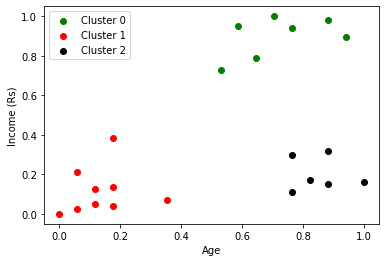

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income(Rs)'],color='green',label="Cluster 0")
plt.scatter(df2['Age'],df2['Income(Rs)'],color='red',label="Cluster 1")
plt.scatter(df3['Age'],df3['Income(Rs)'],color='black', label="Cluster 2")

plt.xlabel('Age')
plt.ylabel('Income (Rs)')
plt.legend()

It is necessary to find centers of all these clusters. Here answer we will get will be an array with three elements.
Each element contains [x,y] 

In [21]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

We plot these points on scatter plot. There are 3 rows and 3 columns.


**Parameters of scatter()**

* Consider all rows of first column so we mention `[:0]` as `x`
* Consider all rows of second column so we mention `[:1]` as `y`
* Take `purple` colour of center of all three clusters
* To distinguish between points and center, make `marker='*'` and provide `label='centroid'`


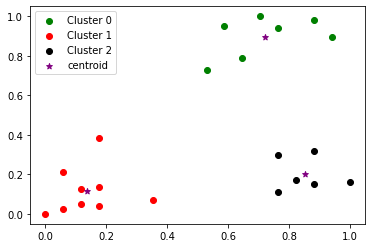

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income(Rs)'],color='green',label='Cluster 0')
plt.scatter(df2.Age,df2['Income(Rs)'],color='red',label='Cluster 1')
plt.scatter(df3.Age,df3['Income(Rs)'],color='black',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Sum of Squares Error (SSE) and Elbow Plot

For larger dataset it is not possible to decide number of clusters initially. Using `Elbo plot` one can decide K. 
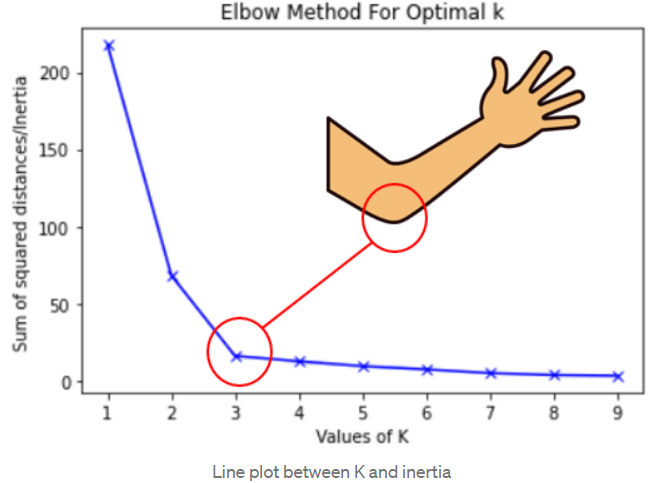In `Elbow Plot`, sum of the squared Error is calculated at each iteration and decreases in each iteration.


`SSE` is the sum of the squared Error is the differences between each observation and the mean that is chossen.
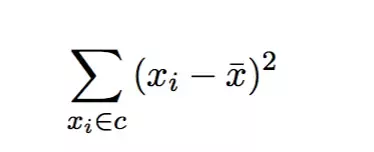
SEE is used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0.

Take `range` from 1 to 10 and store `SEE` in array `sse`. So for each iteration `SEE` is calculated.

Create a K Mean model in each iteration and fit a `df`

To get `SEE`at each iteration, use a parameter called `inertia_` and append to our array 

In [26]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income(Rs)']])
    sse.append(km.inertia_)

In [28]:
# Check SEE for each iteration
# Intitally it is high and later on it decreases
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.1828178462775363,
 0.13781880133764024,
 0.10188787724979426]

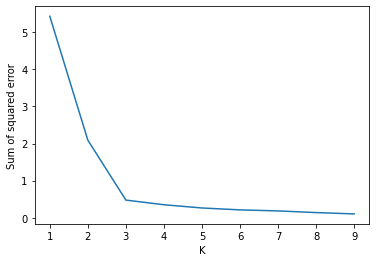

In [29]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Exercise

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k